# Exploratory Analysis

## Summary

The purpose of this report is to describe results obtained from a model that predicts and identifies employees that will likely churn.

- The overall attrition rate is 29.18%.

- Non-promoted employees churn significantly more than others.

- No significant difference in the proportions of bonus winners was found.

- No difference in means for a salary between leavers and stayers.

- Retail seems to be riskier than others.

- Medium and high salaries get the most attrition.

- Sales, operations, and engineering have an average risk.

- Most of the leavers stay 7 or 8 years.

- Most leavers take 3 projects, but not significantly.

- Leavers got higher scores (+0.06) on average than leavers.

- Leavers are a little more representative with lower satisfaction levels (below 0.5).

- There are two kinds of leavers, one below 184 and the other above 184 for working hours.

- Sales with 3 projects are risky.

- Sales dominate in tenure with a pick in 7 years. After-sales, engineering, and operation, with the dowing trend in 6 and after 8 years.

- Tenure and Average hours worked are highly correlated because more experienced employees tend to work more hours and vice-versa.

- More experience comes with lower reviews. more satisfaction.

In [94]:
# Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pywaffle import Waffle
from statsmodels.stats.proportion import proportion_confint
from sklearn.model_selection import train_test_split
import plotly.express as px
import plotly.figure_factory as ff
import plotly.offline as ofl
import plotly.io as pio
import plotly.graph_objects as go
pio.templates.default = "simple_white"

import os
if not os.path.exists("images"):
    os.mkdir("images")

# Read data
df_all = pd.read_csv(
    r'C:\Users\Eric\Documents\employee-attrition\employee-attrition\data\employee_churn_data.csv')

# Set test set aside
train, test = train_test_split(
    df_all.copy(), test_size=0.2, random_state=1234, stratify=df_all["left"])

df_raw = train.copy()  
df = train.copy()    

# Get variable names
bi_vars = [col for col in df.columns if df[col].nunique() == 2]
num_vars = [col for col in df.columns if (df[col].dtype in ["int8", "float32"]) & (col not in bi_vars)]
cat_vars = [col for col in df.columns if (col not in num_vars) & (col not in bi_vars)]

# Order salary categories
sal_type = pd.CategoricalDtype(categories=["low","medium","high"],ordered=True)
df.salary = df.salary.astype(sal_type)

#df.left = df.left.map({1:"yes",0:"no"})
df.bonus = df.bonus.map({1:"yes",0:"no"})
df.promoted = df.promoted.map({1:"yes",0:"no"})

# Look at the data
df.head()

,department,promoted,review,projects,salary,tenure,satisfaction,bonus,avg_hrs_month,left
3776,sales,no,0.760986,3,high,6.0,0.384930,no,181.837758,yes
113,marketing,no,0.623618,4,medium,6.0,0.604917,no,184.256464,no
2020,sales,no,0.645161,4,low,5.0,0.707832,no,180.486349,no
4773,retail,no,0.604603,4,medium,7.0,0.339622,no,186.109852,no
5997,operations,no,0.729080,2,low,7.0,0.245320,no,186.138373,no


In [125]:
bi_vars = [col for col in df_raw.columns if df_raw[col].nunique() == 2]
num_vars = [col for col in df_raw.columns if (df_raw[col].dtype in ["int8", "float32"]) & (col not in bi_vars)]
cat_vars = [col for col in df_raw.columns if (col not in num_vars) & (col not in bi_vars)]

[]

## Attrition rate

In [95]:
# What is the overall attrition rate?
attrition_rate = (df["left"].value_counts(normalize=True)[1]*100).round(2)
print(f"The overall attrition rate is {attrition_rate}%.")

The overall attrition rate is 29.18%.


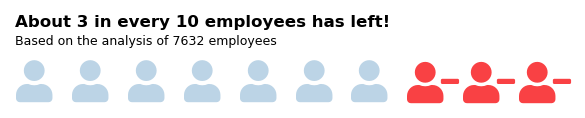

In [96]:
data = round(df["left"].value_counts(normalize=True)*10).to_dict()

fig = plt.figure(figsize=(4,4), dpi=150,
    FigureClass=Waffle, 
    rows=1, 
    values=data, 
    colors=["#bcd4e6","#f94144"],
    legend={'loc': 2, 'bbox_to_anchor': (1, 1)},
    icons=['user', 'user-minus'], 
    font_size=20, 
    icon_legend=False
)
fig.text(0.035,0.58,'About 3 in every 10 employees has left!',fontsize=8,fontweight='bold')
fig.text(0.035,0.55,'Based on the analysis of 7632 employees',fontsize=6)
fig.gca().get_legend().remove()
fig.tight_layout()
plt.show()

## Bonus and Promotion

In [157]:
from scipy.stats import fisher_exact
# Do a larger proportion of leavers or stayers come home with bonus?
# Create a table of cross-tabulations
table_bonus = pd.crosstab(df.bonus,df.left)

#print(table_bonus)
# Perform the Fisher exact test
fisher_bonus = fisher_exact(table_bonus, alternative='two-sided')
#print(fisher_bonus)

# Is the result significant?
alpha = 0.05
if fisher_bonus[1] < alpha:
    print("Proportions of bonus winners differ significantly")
else:
    print("No significant difference in proportions of bonus winners was found.")

# Bonus
fig = go.Figure()
df1=df[["bonus", "left"]]
fig = px.histogram (df1,
                      y="bonus",
                      color="left",
                      barnorm = "percent",
                      text_auto= '.2s',
                      color_discrete_sequence=["#f94144", "#bcd4e6"],
                ) \
        .update_layout (

                    title={
                            "text": "Percent",
                            "x": 0.5
                          },

                    yaxis_title="Percent"
                ) \
        .update_xaxes(categoryorder='total descending')

fig.update_layout(title='<b>Bonus</b>',
                  xaxis_title='Percent',
                  yaxis_title=None,
                  titlefont={'size': 16},
                  width=600,
                  height=350,
                  showlegend=True,
                  font=dict(
                      color ='black',
                      )
                  )
fig.update_traces(textfont_size=12, textangle=0, textposition="inside", cliponaxis=False)
fig.write_image("images/fig1.png", width=1.5*300, height=0.75*300, scale=2)
fig.show()

No significant difference in proportions of bonus winners was found.


In [156]:
# Create a table of cross-tabulations
table_promoted = pd.crosstab(df.promoted,df.left)

#print(table_promoted)
# Perform the Fisher exact test
fisher_promoted = fisher_exact(table_promoted, alternative='two-sided')
#print(fisher_promoted)

# Is the result significant?
alpha = 0.05
if fisher_promoted[1] < alpha:
    print("Proportions of promoted winners differ significantly.")
else:
    print("No significant difference in proportions of promoted winners was found.")


# Promoted
fig = go.Figure()
df1=df[["promoted", "left"]]
fig = px.histogram (df1,
                      x="promoted",
                      color="left",
                      barnorm = "percent",
                      text_auto= '.0f',
                      color_discrete_sequence=["#f94144", "#bcd4e6"],
                ) \
        .update_layout (

                    title={
                            "text": "Percent",
                            "x": 0.5
                          },

                    yaxis_title="Percent"
                ) \
        .update_xaxes(categoryorder='total descending')

fig.update_layout(title='<b>Proportion of promoted</b>',
                  xaxis_title='Percent',
                  yaxis_title=None,                  
                  titlefont={'size': 16},
                  width=400,
                  height=350,
                  showlegend=True,
                  font=dict(
                      color ='black',
                      )
                  )
fig.add_shape( # add a horizontal "target" line
    type="line", line_color="salmon", line_width=2, opacity=0.8, line_dash="dot",
    y0=29, y1=29, x1=-0.5, x0=1.5
)                  
fig.update_traces(textfont_size=12, textangle=0, textposition="inside", cliponaxis=False)
fig.write_image("images/prom.png", scale=2)
fig.show()

Proportions of promoted winners differ significantly.


Non-promoted employees churn significantly more than others.

## Salary and Department

In [155]:
fig = px.histogram(df, y="salary", x=None, color="left",
                width=600,height=350,text_auto='.2s',
                #histnorm='percent',
                category_orders={"salary": ["high","medium","low"]},
                color_discrete_map={ 
                    "yes": "#f94144", "no": "#bcd4e6"
                },
                )
fig.update_layout(title="<b>Salary</b>", 
                  yaxis_title=None,
                  bargap=0.2,
                  barmode='group',
                  titlefont={'size': 16},
                  legend=dict(
                  orientation="v", 
                      y=1, 
                      yanchor="top", 
                      x=1.250, 
                      xanchor="right",)                 
                  )
fig.show()

In [100]:
#Plotly Code
df_raw = train.copy()
df_raw.left = df_raw.left.map({"yes":1,"no":0})

prop_te = df_raw.groupby('salary')['left'].sum()/ df_raw.groupby("salary").size()
prop_te = prop_te.mean()

fig = go.Figure()
df1=df[["salary", "left"]]
fig = px.histogram (df1,
                      x="salary",
                      color="left",
                      barnorm = "percent",
                      text_auto= '.2s',
                      color_discrete_sequence=["#f94144", "#bcd4e6"],
                )

fig.update_layout(xaxis_showgrid=False, xaxis_zeroline=False)
fig.update_layout(title='<b> Salary Level <b>',
                  xaxis_title=None,
                  yaxis_title="Percent",
                  titlefont={'size': 16},
                  width=600,
                  height=350,
                  showlegend=True,
                  font=dict(
                      color ='black',
                      )
                  )
fig.add_shape( # add a horizontal "target" line
    type="line", line_color="salmon", line_width=2, opacity=0.8, line_dash="dot",
    y0=prop_te*100, y1=prop_te*100, x1=-0.5, x0=2.5
)
fig.show()

No difference in means.

In [101]:
fig = px.histogram(df, y="department", x=None, color="left",
                width=600,height=350,
                histnorm='percent',
                color_discrete_map={ 
                    "yes": "#f94144", "no": "#bcd4e6"
                },
                )
fig.update_yaxes(categoryorder='total ascending')
fig.update_layout(title="<b>Department</b>", 
                  yaxis_title=None,
                  bargap=0.2,
                  barmode='group',
                  titlefont={'size': 18},
                  legend=dict(
                  orientation="v", 
                      y=1, 
                      yanchor="top", 
                      x=1.250, 
                      xanchor="right",)                 
                  )
fig.show()

In [102]:
data_dep = pd.DataFrame(df_raw.groupby('department')['left'].sum().sort_values(ascending=False)).reset_index()

fig = px.bar(data_dep, y='left', x='department', text='left',color ="department",
title="<b>Attrition ranking by department</b>",
 color_discrete_map={
                "sales": "#f94144",
                "retail": "#f94144",
                "operations": "#f94144",
                "engineering": "#f94144",
                "marketing": "#bcd4e6",
                "support": "#bcd4e6",
                "admin": "#bcd4e6",
                "logistics": "#bcd4e6",
                "finance": "#bcd4e6",
                "IT": "#bcd4e6",
                
                }

)
fig.update_traces(texttemplate='%{text:.2s}', textposition='inside')
fig.update_layout(uniformtext_minsize=5,
    uniformtext_mode='hide',
    width=600,
    showlegend=False,
    yaxis_title=None,
    xaxis_title=None,
    height=450,
    titlefont={'size': 18},
 )
fig.write_image("images/rank_dep.png", width=1.5*450, height=0.75*600, scale=2)                      
fig.show()

In [153]:
all_dep = df_raw.groupby("department").size()
yes_dep = df_raw.groupby('department')['left'].sum()
prop_dep = yes_dep/ all_dep

ci_low, ci_upp = proportion_confint(yes_dep.values, all_dep.values, method="beta",alpha=0.05)

dep_df = prop_dep.to_frame(name="probability").reset_index()
dep_df["low"] = ci_low
dep_df["high"] = ci_upp
dep_df["diff"] = ci_upp -ci_low
dep_df["count"] = yes_dep.values
dep_df = dep_df.sort_values("diff", ascending=False)



fig = px.scatter(dep_df, y="department", x="probability",size="count",size_max=10,opacity=1,
    title="<b>What department get the most attrition?</b>",
                     error_x="diff")

fig.update_traces(textposition="middle right", textfont_size=5, marker=dict(color="#0b3954"))
fig.update_xaxes(categoryorder='total descending')
fig.update_layout(legend=dict(font=dict(size=8),
                                  orientation="h",
                                  yanchor="bottom",
                                  y=1, title=' ',
                                  xanchor="right",
                                  x=1),
                    yaxis_title=None,
                  titlefont={'size': 18},
                    width=550,
                    height=400, legend_title=dict(font=dict(size=8)))
fig.update_annotations(font_size=8)
fig.add_annotation(dict(font=dict(color='black', size=8),
                            x=0,
                            y=-0.31,
                            showarrow=False,
                            text="Including 95% C.I. with mean line. Size of points is proportional to frequency.",
                            textangle=0,
                            xanchor='left',
                            xref="paper",
                            yref="paper"))
fig.add_shape( # add a horizontal "target" line
    type="line", line_color="salmon", line_width=2, opacity=1, line_dash="dot",
    x0=dep_df.probability.mean(), x1=dep_df.probability.mean(), y1=-1, y0=10
)
fig.write_image("images/prob_dep.png", scale=2)       
fig.show()

Sales, Operations and Engineering departments share almost the same distribution.
Retail seems to be more risky than others.

In [154]:
all_sal = df_raw.groupby("salary").size()
yes_sal = df_raw.groupby('salary')['left'].sum()
prop_sal = yes_sal/ all_sal
ci_low, ci_upp = proportion_confint(yes_sal.values, all_sal.values, method="beta",alpha=0.05)

sal_df = prop_sal.to_frame(name="probability").reset_index()
sal_df["low"] = ci_low
sal_df["high"] = ci_upp
sal_df["diff"] = ci_upp - ci_low
sal_df["count"] = yes_sal.values
sal_df = sal_df.sort_values("diff", ascending=False)

fig = px.scatter(sal_df, y="salary", x="probability",size="count",size_max=10,opacity=1,
    title="<b>What salary get the most attrition?</b>",category_orders={"salary": ["high","medium","low"]},
                     error_x="diff")

fig.update_traces(textposition="middle right", textfont_size=5,marker=dict(color="#0b3954"))
fig.update_layout(legend=dict(font=dict(size=8),
                                  orientation="h",
                                  yanchor="bottom",
                                  y=1, title=' ',
                                  xanchor="right",
                                  x=1),
                yaxis_title=None,
                titlefont={'size': 18},
                width=550,
                height=400, legend_title=dict(font=dict(size=8)))
fig.update_annotations(font_size=8)
fig.add_annotation(dict(font=dict(color='black', size=8),
                            x=0,
                            y=-0.31,
                            showarrow=False,
                            text="Including 95% C.I. with the mean line. Size of points is proportional to frequency.",
                            textangle=0,
                            xanchor='left',
                            xref="paper",
                            yref="paper"))
fig.add_shape( # add a horizontal "target" line
    type="line", line_color="salmon", line_width=2, opacity=1, line_dash="dot",
    x0=sal_df.probability.mean(), x1=sal_df.probability.mean(), y1=-1, y0=3
)
fig.write_image("images/prob_sal.png", scale=2)   
fig.show()

## Tenure and Projects

In [131]:
fig = px.histogram(df, x="tenure", y=None, color="left",
                width=600,height=350,
                #histnorm='probability density',
                color_discrete_map={ 
                    "yes": "#f94144", "no": "#bcd4e6"
                },
                )
fig.update_layout(title="<b>Years of experience</b>", 
                  bargap=0.2,
                  barmode='group',
                  xaxis_title='Number of years',
                  titlefont={'size': 18},
                  legend=dict(
                  orientation="v", 
                      y=1, 
                      yanchor="top", 
                      x=1.250, 
                      xanchor="right",)                 
                  )
fig.show()

Most of the leavers stay 7 or 8 years.

In [132]:
#Plotly Code
prop_te = df_raw.groupby('tenure')['left'].sum()/ df_raw.groupby("tenure").size()
prop_te = prop_te.mean()

fig = go.Figure()
df1=df[["tenure", "left"]]
fig = px.histogram (df1,
                      x="tenure",
                      color="left",
                      barnorm = "percent",
                      text_auto= '.2s',
                      color_discrete_sequence=["#f94144", "#bcd4e6"],
                )

fig.update_layout(xaxis_showgrid=False, xaxis_zeroline=False)
fig.update_layout(title='<b> Proportion of tenure by attrition status <b>',
                  xaxis_title='Number of years',
                  yaxis_title="Percent",
                  bargap=0.2,
                  titlefont={'size': 16},
                  width=600,
                  height=350,
                  showlegend=True,
                  font=dict(
                      color ='black',
                      )
                  )
fig.add_shape( # add a horizontal "target" line
    type="line", line_color="salmon", line_width=2, opacity=0.8, line_dash="dot",
    y0=prop_te*100, y1=prop_te*100, x1=1.5, x0=12.5
)
fig.write_image("images/tenure_prop.png", scale=2)      
fig.show()

The newest employees (2-3 years) have the highest attrition rate, but they are not significant due to their size relative to the entire population.

In [114]:
fig = px.histogram(df, x="projects", y=None, color="left",
                width=600,height=350,
                text_auto= '.2s',
                #histnorm='probability density',
                color_discrete_map={ 
                    "yes": "#f94144", "no": "#bcd4e6"
                },
                )

fig.update_layout(title="<b>Projects</b>", 
                  bargap=0.2,
                  xaxis_title='Number of projects',
                  barmode='group',
                  titlefont={'size': 18},
                  legend=dict(
                  orientation="v", 
                      y=1, 
                      yanchor="top", 
                      x=1.250, 
                      xanchor="right",)                 
                  )

fig.show()

Most leavers take 3 projects, but not significantly.

In [135]:
#Plotly Code
prop_pro = df_raw.groupby('projects')['left'].sum()/df_raw.groupby("projects").size()
prop_pro = prop_pro.mean()

fig = go.Figure()
df1=df[["projects", "left"]]
fig = px.histogram (df1,
                      x="projects",
                      color="left",
                      barnorm = "percent",
                      text_auto= '.2s',
                      color_discrete_sequence=["#f94144", "#bcd4e6"],
                )

fig.update_layout(xaxis_showgrid=False, xaxis_zeroline=False)
fig.update_layout(title='<b> Proportion of projects by attrition status<b>',
                  xaxis_title='Number of projects',
                  yaxis_title="Percent",
                  bargap=0.2,
                  titlefont={'size': 16},
                  width=500,
                  height=350,
                  showlegend=True,
                  font=dict(
                      color ='black',
                      )
                  )
fig.add_shape( # add a horizontal "target" line
    type="line", line_color="salmon", line_width=2, opacity=1, line_dash="dot",
    y0=prop_pro*100, y1=prop_pro*100, x1=1.5, x0=5.5
)
fig.show()

But we can't see much difference between leavers and stayers related to the number of projects.

## Review, Satisfaction and Average Hours Worked per Month

In [115]:
# Comparing the distribution of review for employees born to mothers with different attrition statuses
left_yes = df[df["left"] == "yes"]
left_no = df[df["left"] == "no"]

fig = go.Figure()
fig.add_trace(go.Violin(x=left_no["review"], line_color='#bcd4e6', name= 'Stayer', y0=0))
fig.add_trace(go.Violin(x=left_yes["review"], line_color='#f94144', name='Leaver', y0=0))


fig.update_traces(orientation='h', side='positive', meanline_visible=True)
fig.update_layout(xaxis_showgrid=False, xaxis_zeroline=False)

fig.update_layout(title='<b>Review by Attrition Status</b>',
                  xaxis_title='Level',
                  titlefont={'size': 16},
                  width=600,
                  height=350,
                  showlegend=True,
                  font=dict(
                      color ='black',
                      )
                  )
fig.show()

The plot compares the distribution of review for two groups (attrited status). 

The two distributions are simililar in shape, except stayers appears more tighly distributed about its center. 

⭐ Leavers got higher scores (+0.06) on average than leavers.


In [116]:
# data for plotting 
fig = go.Figure()

fig.add_trace(go.Violin(x=left_no["satisfaction"], line_color='#bcd4e6', name= 'Stayer', y0=0))
fig.add_trace(go.Violin(x=left_yes["satisfaction"], line_color='#f94144', name='Leaver', y0=0))

fig.update_traces(orientation='h', side='positive', meanline_visible=True)
fig.update_layout(xaxis_showgrid=False, xaxis_zeroline=False)

fig.update_layout(title='<b>Satisfaction by Attrition Status</b>',
                  xaxis_title='Satisfaction level',
                  titlefont={'size': 16},
                  width=600,
                  height=350,
                  showlegend=True,
                  font=dict(
                      color ='black',
                      )
                  )
fig.show()

Although both groups share the same mean, leavers are little more representative with lower satisfaction levels (below 0.5).

In [117]:
# data for plotting
fig = go.Figure()

fig.add_trace(go.Violin(x=left_no["avg_hrs_month"], line_color='#bcd4e6', name= 'Stayer', y0=0))
fig.add_trace(go.Violin(x=left_yes["avg_hrs_month"], line_color='#f94144', name='Leaver', y0=0))

fig.update_traces(orientation='h', side='positive', meanline_visible=True)
fig.update_layout(xaxis_showgrid=False, xaxis_zeroline=False)
fig.update_layout(title='<b>Average Hours Worked (month) by Attrition Status</b>',
                  xaxis_title='Average number of hours',
                  titlefont={'size': 16},
                  width=600,
                  height=350,
                  showlegend=True,
                  font=dict(
                      color ='black',
                      )
                  )
fig.show()

The distribution of leavers has two modes, one on the left side around 181 and the other near 187. The left mode has a longer tail with the values less tighted around the mean than the right sided median. 

This indicate there are two kinds of leavers, one below 184 and the other above 184.

## Correlations

In [137]:
df.corr(method="spearman")

,review,projects,tenure,satisfaction,avg_hrs_month
review,1.000000,-0.005864,-0.158895,-0.342556,-0.166880
projects,-0.005864,1.000000,0.022848,0.010042,0.021358
tenure,-0.158895,0.022848,1.000000,-0.174388,0.978928
satisfaction,-0.342556,0.010042,-0.174388,1.000000,-0.173456
avg_hrs_month,-0.166880,0.021358,0.978928,-0.173456,1.000000


In [140]:
corr = df.corr(method="spearman") # because aceppts ordinal variables
mask = np.triu(np.ones_like(corr, dtype=np.bool_))
corr = corr.mask(mask)

fig = ff.create_annotated_heatmap(
    z=corr.to_numpy().round(2),
    x=list(corr.index.values),
    y=list(corr.columns.values),       
    xgap=3, ygap=3,
    zmin=-1, zmax=1,
    colorscale='Picnic',reversescale=False,
    colorbar_thickness=30,
    colorbar_ticklen=3,
)
fig.update_layout(title_text='<b>Correlation Matrix</b>',
                  title_x=0.5,
                  titlefont={'size': 18},
                  width=500, height=350,
                  xaxis_showgrid=False,
                  xaxis={'side': 'bottom'},
                  yaxis_showgrid=False,
                  yaxis_autorange='reversed',                   
                  )
fig.show()

corr = left_yes.corr(method="spearman") # because aceppts ordinal variables
mask = np.triu(np.ones_like(corr, dtype=np.bool_))
corr = corr.mask(mask)

fig = ff.create_annotated_heatmap(
    z=corr.to_numpy().round(2),
    x=list(corr.index.values),
    y=list(corr.columns.values),       
    xgap=3, ygap=3,
    zmin=-1, zmax=1,
    colorscale='Picnic',reversescale=False,
    colorbar_thickness=30,
    colorbar_ticklen=3,
)

fig.update_layout(title_text='<b>Correlation Matrix for Leavers</b>',
                  title_x=0.5,
                  titlefont={'size': 18},
                  width=500, height=350,
                  xaxis_showgrid=False,
                  xaxis={'side': 'bottom'},
                  yaxis_showgrid=False,
                  yaxis_autorange='reversed',                   
                  )
fig.write_image("images/corr_leavers.png",scale=2)                       
fig.show()

Tenure and Average hours worked are highly correlated because more experienced employees tend to work more hours and vice-versa.

More experience comes with lower reviews. 

More working hours or experience comes with more satisfaction.

Experienced employees are satisfied.

## Levears by Department

In [141]:
# Normalized proportion of departments by tenure
per_exp = pd.crosstab(index=left_yes.department, columns=left_yes.tenure,margins=False,normalize=True).reset_index()
per_exp = pd.melt(per_exp, id_vars=["department"], value_vars=[2, 3, 4, 5, 6, 7, 8, 9])

fig = px.line(per_exp, x="tenure", y="value", color='department')

fig.update_layout(title='<b>Department and Years of Experience (leavers)</b>',
                  xaxis_title='Number of years',
                  yaxis_title=None,
                  titlefont={'size': 18},
                  width=600,
                  height=350,
                  showlegend=True,
                  font=dict(
                      color ='black',
                      )
                  )
# color "Canada" black and change the width of the line
fig.update_traces(patch={"line": {"color": "#bfd7ea", "width": 2,"dash": 'dot'}})
fig.update_traces(patch={"line": {"color": "#0b3954", "width": 2,"dash": 'solid'}},
                  selector={"legendgroup": "sales",})

fig.write_image("images/exp_dep.png",scale=2)    
fig.show()

Engineering decays in 7 years.

In [ ]:
# Number of projects and department. Each connected line displays the proportion of leavers with the number of projects within department.
per_projects = pd.crosstab(index=left_yes.department, columns=left_yes.projects,margins=False,normalize="all").reset_index()
per_projects = pd.melt(per_projects, id_vars=["department"], value_vars=[2, 3, 4, 5])
fig = px.line(per_projects, x="projects", y="value", color='department')

fig.update_layout(title='<b>Department and Projects (leavers)</b>',
                  xaxis_title='Number of projects',
                  yaxis_title=None,
                  titlefont={'size': 18},
                  width=600,
                  height=350,
                  showlegend=True,
                  font=dict(
                      color ='black',
                      )
                  )
fig.update_traces(patch={"line": {"color": "#bfd7ea", "width": 2,"dash": 'dot'}})
fig.update_traces(patch={"line": {"color": "#0b3954", "width": 2,"dash": 'solid'}},#
                  selector={"legendgroup": "sales"})

fig.show()

Employees from the sales department are more likely to quit.